In [61]:
# This is the import cell
import sys
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.lines import Line2D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import matplotlib.ticker as ticker
from collections import OrderedDict
from scipy import stats
from PIL import Image
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import pylab as plot
first = True
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", 10)



# Here are my rc parameters for matplotlibf
fsize = 20
mpl.rc('font', serif='Helvetica Neue')
#mpl.rc('font', serif='Times New Roman')
mpl.rcParams.update({'font.size': fsize})
mpl.rcParams['figure.figsize'] = 3.2, 2.8
mpl.rcParams['figure.dpi'] = 500
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['axes.linewidth'] = 1.5
# Set x tick params
mpl.rcParams['xtick.major.size'] = 4.5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['xtick.minor.size'] = 3.
mpl.rcParams['xtick.minor.width'] = 1.25
# Set y tick params
mpl.rcParams['ytick.major.size'] = 4.5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['ytick.minor.size'] = 3.
mpl.rcParams['ytick.minor.width'] = 1.25
mpl.rcParams['legend.fontsize']= 20.
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "Times New Roman"
# Load LaTeX and amsmath
# mpl.rc('text', usetex=True)
# mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]

In [62]:
# Get the current path
if first:
    parent = os.getcwd()
print(parent)
# Grab file names from data folder
dens = os.listdir('../11_23_21_txt_files/random')
try:
    data.remove('.DS_Store')
except:
    print(".DS_Store not in directory")
    
# Grab the MCS data
pres2 = os.listdir('../fast_out_txt_files/BubComp')
try:
    pres.remove('.DS_Store')
except:
    print(".DS_Store not in directory")

/Users/nicklauersdorf/hoomd-blue/build/njlauersdorf/ABPs/post_proc/Jupyter
.DS_Store not in directory
.DS_Store not in directory


In [63]:
# Some functions to get the relevant data from the filenames
def checkFile(fname, string):
    for i in range(len(fname)):
        if fname[i] == string[0]:
#             print"{} matches {}".format(fname[i], string[0])
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
#                     print"{} matches {}".format(fname[i+j], string[j])
                    if j == (len(string) - 1):
#                         print"Final match!"
                        return True
                else:
                    break
    return False
    
def txtValue(fname, string):
    out = ""
    index = 0
    for i in range(len(fname)):
        if fname[i] == string[0]:
            for j in range(1, len(string)):
                if (i + j) > (len(fname) - 1):
                    break
                elif fname[i + j] == string[j]:
                    if j == (len(string) - 1):
                        # Last index of search string
                        index = i + j
                else:
                    break
                        
    # First index of value
    index += 1
    mybool = True
    while mybool:
        if fname[index].isdigit():
            out = out + fname[index]
            index += 1
        elif fname[index] == ".":    
            if fname[index+1].isdigit():
                out = out + fname[index]
                index += 1
            else:
                mybool = False
        else:
            mybool = False
    return float(out)

# Sorting functions
def multiSort(arr1, arr2, arr3, arr4):
    """Sort an array the slow (but certain) way, returns original indices in sorted order"""
    # Doing this for PeR, PeS, xS in this case
    cpy1 = np.copy(arr1)
    cpy2 = np.copy(arr2)
    cpy3 = np.copy(arr3)
    cpy4 = np.copy(arr4)
    ind = np.arange(0, len(arr1))
    for i in range(len(cpy1)):
        for j in range(len(cpy1)):
            # Sort by first variable
            if cpy1[i] > cpy1[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            # If first variable is equal, resort to second variable
            elif cpy1[i] == cpy1[j] and cpy2[i] > cpy2[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
                
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] > cpy3[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
            elif cpy1[i] == cpy1[j] and cpy2[i] == cpy2[j] and cpy3[i] == cpy3[j] and cpy4[i] > cpy4[j] and i < j:
                # Swap copy array values
                cpy1[i], cpy1[j] = cpy1[j], cpy1[i]
                cpy2[i], cpy2[j] = cpy2[j], cpy2[i]
                cpy3[i], cpy3[j] = cpy3[j], cpy3[i]
                cpy4[i], cpy4[j] = cpy4[j], cpy4[i]
                # Swap the corresponding indices
                ind[i], ind[j] = ind[j], ind[i]
    return ind

def indSort(arr1, arr2):
    """Take sorted index array, use to sort array"""
    # arr1 is array to sort
    # arr2 is index array
    cpy = np.copy(arr1)
    for i in range(len(arr1)):
        arr1[i] = cpy[arr2[i]]

In [64]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in dens:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 
                
# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(dens, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_dens = []
os.chdir(parent)
os.chdir('../11_23_21_txt_files/random')
for i in dens:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_dens.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_dens[0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,num_dens,press
0,0.0,5.016308,12,1,1,0.000000,3.035398,-0.109558,2.414583,-13.226828
1,0.0,5.016308,12,1,1,3.035398,6.070796,-0.122262,1.201624,-7.345662
2,0.0,5.016308,12,1,1,6.070796,9.106195,0.001385,1.618791,0.112062
3,0.0,5.016308,12,1,1,9.106195,12.141593,-0.010973,1.331179,-0.730356
4,0.0,5.016308,12,1,1,12.141593,15.176991,0.017516,1.639952,1.436247
...,...,...,...,...,...,...,...,...,...,...
160654,99.8,5.016308,3491,1,0,154.821429,157.857143,0.217028,NaN,NaN
160655,99.8,5.016308,3491,1,0,157.857143,160.892857,-0.094922,NaN,NaN
160656,99.8,5.016308,3491,1,0,160.892857,163.928571,-0.002683,NaN,NaN
160657,99.8,5.016308,3491,1,0,163.928571,166.964286,-0.082801,NaN,NaN


In [65]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params = pd.DataFrame(columns=headers)
for i in range(0, len(all_dens)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params = params.append(df, ignore_index = True)
display(params)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,50,50,50.0,1.0,60.0,0.000001
1,0,50,350,50.0,1.0,60.0,0.000001
2,0,50,150,50.0,1.0,60.0,0.000001
3,0,50,100,50.0,1.0,60.0,0.000001
4,0,50,250,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
16,0,200,200,50.0,1.0,60.0,0.000001
17,0,200,250,50.0,1.0,60.0,0.000001
18,0,250,250,50.0,1.0,60.0,0.000001
19,0,250,350,50.0,1.0,60.0,0.000001


In [66]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_dens)):
    # Ger rid of NaN in favor of 0
    all_dens[i].fillna(0, inplace=True)

headers=list(all_dens[0])
display(all_dens[0])
print(all_dens[0][headers[1]][0])
print(all_dens[0][headers[2]][0])

,tauB,sizeBin,clust_size,interface_id,bub_id,r_min,r_max,align,num_dens,press
0,0.0,5.016308,12,1,1,0.000000,3.035398,-0.109558,2.414583,-13.226828
1,0.0,5.016308,12,1,1,3.035398,6.070796,-0.122262,1.201624,-7.345662
2,0.0,5.016308,12,1,1,6.070796,9.106195,0.001385,1.618791,0.112062
3,0.0,5.016308,12,1,1,9.106195,12.141593,-0.010973,1.331179,-0.730356
4,0.0,5.016308,12,1,1,12.141593,15.176991,0.017516,1.639952,1.436247
...,...,...,...,...,...,...,...,...,...,...
160654,99.8,5.016308,3491,1,0,154.821429,157.857143,0.217028,0.000000,0.000000
160655,99.8,5.016308,3491,1,0,157.857143,160.892857,-0.094922,0.000000,0.000000
160656,99.8,5.016308,3491,1,0,160.892857,163.928571,-0.002683,0.000000,0.000000
160657,99.8,5.016308,3491,1,0,163.928571,166.964286,-0.082801,0.000000,0.000000


5.016308
12


In [67]:
# Grab parameters, sort them
chkStrings = ["pe", "pa", "pb", "xa", "eps", "phi", "cluster", "dtau"]
default = [0., 0., 0., 100., 1., 60., 0, 0.000001]
storeVals = [[] for i in chkStrings]
for i in pres2:
    for j in range(0, len(chkStrings)):
        if chkStrings[j] != "cluster":
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(txtValue(i, chkStrings[j]))
            else:
                storeVals[j].append(default[j])  
        else:
            if checkFile(i, chkStrings[j]):
                storeVals[j].append(1)
            else:
                storeVals[j].append(default[j]) 

# Issue with epsilon in file output 0 -> 0.0001
for i in range(0, len(storeVals[4])):
    if storeVals[4][i] == 0.0:
        storeVals[4][i] = 0.0001

# Sort the arrays
if len(storeVals[0]) > 1:
    # Sort them!
#     print("Sorting... ")
    # Sort by: pe, phi, epsilon, cluster
    indArr = multiSort(storeVals[chkStrings.index("pa")],
                       storeVals[chkStrings.index("phi")],
                       storeVals[chkStrings.index("eps")],
                       storeVals[chkStrings.index("cluster")])
    indSort(pres2, indArr)
    for i in storeVals:
        indSort(i, indArr)
    
# Now that the data is sorted, read it into a dataframe
all_pres_new = []
os.chdir(parent)
os.chdir('../fast_out_txt_files/BubComp')
for i in pres2:
#     print(i)
    df = pd.read_csv(i, sep='\s+', header=0)
    all_pres_new.append(df)
os.chdir(parent)

# This is how you access the data at different levels
display(all_pres_new[-1])
print(storeVals)

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,NBin
0,0.0,5.016308,45357,1,1,7942,20742,93.612591,1.803694,607.132049,396.498974,35.559082,4.617106,799


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 50.0, 50.0, 50.0, 50.0, 50.0, 100.0, 100.0, 100.0, 100.0, 100.0, 150.0, 150.0, 150.0, 150.0, 150.0, 200.0, 200.0, 200.0, 250.0, 250.0, 250.0, 350.0, 350.0, 450.0], [450.0, 350.0, 200.0, 250.0, 150.0, 450.0, 350.0, 200.0, 250.0, 200.0, 250.0, 150.0, 100.0, 450.0, 150.0, 450.0, 350.0, 250.0, 200.0, 350.0, 200.0, 450.0, 450.0, 350.0, 250.0, 450.0, 350.0, 450.0], [50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0], [60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0,

In [68]:
# Grab the parameters from each file, store in a dataframe
headers = ['pe', 'peA', 'peB', 'xA', 'eps', 'phi', 'tauPer_dt']
params3 = pd.DataFrame(columns=headers)
for i in range(0, len(all_pres_new)):
    pe = int(storeVals[chkStrings.index("pe")][i])
    pa = int(storeVals[chkStrings.index("pa")][i])
    pb = int(storeVals[chkStrings.index("pb")][i])
    xa = float(storeVals[chkStrings.index("xa")][i])
    ep = float(storeVals[chkStrings.index("eps")][i])
    phi = float(storeVals[chkStrings.index("phi")][i])
    dtau = float(storeVals[chkStrings.index("dtau")][i])
    df = pd.DataFrame([[pe, pa, pb, xa, ep, phi, dtau]], columns=headers)
    params3 = params3.append(df, ignore_index = True)
display(params3)

,pe,peA,peB,xA,eps,phi,tauPer_dt
0,0,0,450,50.0,1.0,60.0,0.000001
1,0,0,350,50.0,1.0,60.0,0.000001
2,0,0,200,50.0,1.0,60.0,0.000001
3,0,0,250,50.0,1.0,60.0,0.000001
4,0,50,150,50.0,1.0,60.0,0.000001
...,...,...,...,...,...,...,...
23,0,250,350,50.0,1.0,60.0,0.000001
24,0,250,250,50.0,1.0,60.0,0.000001
25,0,350,450,50.0,1.0,60.0,0.000001
26,0,350,350,50.0,1.0,60.0,0.000001


In [69]:
# Let's add columns to the time-resolved simulation data
for i in range(len(all_pres_new)):
    # Ger rid of NaN in favor of 0
    all_pres_new[i].fillna(0, inplace=True)

headers=list(all_pres_new[0])
display(all_pres_new[0])
print(all_pres_new[0][headers[1]][0])
print(all_pres_new[0][headers[2]][0])

,tauB,sizeBin,clust_size,int_id,bub_id,Na,Nb,radius,radius_err,sa_ext,sa_int,edge_width,edge_width_err,NBin
0,0.0,5.016308,41139,1,1,7215,16908,96.659862,25.753825,605.782830,264.723890,59.983846,37.810336,735
1,0.0,5.016308,41139,1,4,381,0,4.934989,2.004667,39.953097,0.000000,4.934989,2.004667,10
2,0.1,5.016308,41792,1,1,7482,17303,81.282826,1.619145,547.460364,334.526603,29.462453,2.661090,599
3,0.2,5.016308,42974,1,1,7145,18599,82.548421,1.750547,541.643972,336.857444,30.257661,3.087644,618
4,0.3,5.016308,43891,1,1,6345,19444,84.131052,1.538991,547.471316,353.164951,29.970413,3.073389,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2425,199.6,5.016308,29329,2,2,8233,12217,85.392254,33.902297,640.034515,31.148915,80.459086,34.082596,631
2426,199.7,5.016308,29313,2,2,7314,11535,73.750435,9.264125,559.178240,323.630541,27.399418,15.970234,528
2427,199.7,5.016308,29313,2,3,88,63,3.405547,1.833391,28.337257,0.000000,3.405547,1.833391,12
2428,199.8,5.016308,29289,1,1,7388,11725,75.171986,9.496729,558.490900,319.153571,29.440442,15.274792,560


5.016308
41139


In [70]:
# All data is loaded, now compute analytical aspects
r_cut = (2.**(1./6.))

# Get lattice spacing for particle size
def ljForce(r, eps, sigma=1.):
    div = (sigma/r)
    dU = (24. * eps / sigma) * ((2*(div**13)) - (div)**7)
    return dU

# # Lennard-Jones pressure
# def ljPress(r, eps, sigma=1.):
#     phiCP = np.pi / (2. * np.sqrt(3.))
#     div = (sigma/r)
#     dU = (24. * eps / r) * ((2.*(div**12.)) - (div)**6.)
#     # This is just pressure divided by the area of a particle
# #     return (12. * dU / (np.pi * r))
#     return (12. * dU / (np.pi * r * phiCP))

def ljPress(r, pe, eps, sigma=1.):
    phiCP = np.pi / (2. * np.sqrt(3.))
    # This is off by a factor of 1.2...
    ljF = avgCollisionForce(pe)
    return (2. *np.sqrt(3) * ljF / r)
    
def avgCollisionForce(pe, power=1.):
    '''Computed from the integral of possible angles'''
    peCritical = 40.
    if pe < peCritical:
        pe = 0
    else:
        pe -= peCritical
    magnitude = 6.
    # A vector sum of the six nearest neighbors
    magnitude = np.sqrt(28)
#     return (magnitude * (pe**power)) / (np.pi)
#     return (pe * (1. + (8./(np.pi**2.))))
    coeff = 1.92#2.03#3.5#2.03
    #coeff= 0.4053
    return (pe * coeff)

def fStar(pe, epsilon, sigma=1.):
    out = (avgCollisionForce(pe) * sigma) / (24.*epsilon)
    return out
    
def conForRClust(pe, eps):
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(pe):
            r -= j
        r += j
    out = r
    return out

def nonDimFLJ(r, sigma=1.):
    div = (sigma/r)
    dU = ((2*(div**13)) - (div)**7)
    return dU

def latForFStar(fstar):
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while nonDimFLJ(r) < fstar:
            r -= j
        r += j
    out = r
    return out
    
def latToPhi(latIn):
    '''Read in lattice spacing, output phi'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    return phiCP / (latIn**2)

# From area fraction, get lattice spacing
def phiToLat(phiIn):
    '''Read in phi, output the lattice spacing'''
    phiCP = np.pi / (2. * np.sqrt(3.))
    latCP = 1.
    return np.sqrt(phiCP / phiIn)
    
def compPhiG(pe, a, kap=4.5, sig=1.):
    num = 3. * (np.pi**2) * kap * sig
    den = 4. * pe * a
    return num / den
    
def clustFrac(phi, phiG, a, sig=1.):
    phiL = latToPhi(a)
    ApL = np.pi * (sig**2) / 4.
    Ap = np.pi * (sig**2) / 4.
    num = (phiL*phiG) - (phiL*phi)
    den = (phi*phiG) - (phi*phiL)
    ans = num / den
    return ans

def radCurve(area):
    # From area of circle get curvature
    return np.sqrt(area/np.pi)

def radCirc(circ):
    return circ / (2. * np.pi)

In [71]:
# Let's use analytical theory and kinetic theory to get cluster radius
epsRange = [1., 0.1, 0.01, 0.001, 0.0001]
# epsRange = [0.0001, 0.001, 0.01, 0.1, 1.]
peRange = np.arange(0., 700., 1.)
phiRange = [0.45, 0.55, 0.65]
N = 100000.
norm = 10.**0.
# norm = 1.

phiCP = np.pi / (2. * np.sqrt(3))
lat = []
pColl = []
pLJ = []
cfs = []
Rls = []
peCrit = []
phiGs = []
phiCPs = []
a_box = []
l_box = []
for b in range(0, len(phiRange)):
    lat.append([])
    phiCPs.append([])
    pColl.append([])
    pLJ.append([])
    cfs.append([])
    Rls.append([])
    phiGs.append([])
    peCrit.append([])
    a_box.append(N * np.pi * 0.25 / phiRange[b])
    l_box.append(np.sqrt(a_box[-1]))
    for i in range(0, len(epsRange)):
        lat[b].append([])
        phiCPs[b].append([])
        pColl[b].append([])
        pLJ[b].append([])
        cfs[b].append([])
        Rls[b].append([])
        phiGs[b].append([])
        for j in range(0, len(peRange)):
            # Compute lattice spacing
        
            lat[b][i].append(conForRClust(peRange[j], epsRange[i]))
            phiCPs[b][i].append(latToPhi(lat[b][i][-1]))
            # Compute pressure
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP)
            #curPLJ = ljPress(lat[b][i][-1], epsRange[i]) / (np.pi * (lat[b][i][-1]**2) * 0.25 * phiCP * (lat[b][i][-1]**(0.5)) * 1.25)
            curPLJ = ljPress(lat[b][i][-1], peRange[j], epsRange[i])
            
            # Append to list
            pLJ[b][i].append(curPLJ/(norm))

            # Compute cluster fraction
            phiG = compPhiG(peRange[j], lat[b][i][-1])
            phiGs[b][i].append(phiG)
            if peRange[j] > 35.:
                cf = clustFrac(phiRange[b], phiG, lat[b][i][-1])
                if cf < 0. or cf > 1.:
                    cf = 0.
            else:
                cf = 0
            cfs[b][i].append(cf)

            # Get the critical activity
            if j > 0:
                if cfs[b][i][-2] == 0. and cfs[b][i][-1] > 0.:
                    peCrit[b].append(peRange[j])

            # Get the radius (for some N)
            Nl = cfs[b][i][-1] * N
            Al = Nl * ((np.pi * (lat[b][i][-1]**2))/(4*phiCP))
            Rl = np.sqrt(Al / (np.pi))
            Rls[b][i].append(Rl)

/Users/nicklauersdorf/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in double_scalars


In [126]:
align_peA=np.array([])
align_peB=np.array([])
align_peNet=np.array([])
align_xA=np.array([])
align_eps=np.array([])
align_pnum=np.array([])
align_phi=np.array([])
align_press_arr = np.array([])

radius_arr_final = np.linspace(0,1,num=50)
num_dens_arr_final = np.zeros(50)
align_arr_final = np.zeros(50)
press_arr_final = np.zeros(50)
final_count = np.zeros(50)
final_count_count = np.zeros(50)
for i in range(0, len(all_dens)):
    for l in range(0, len(all_pres_new)):
        if params3['peA'][l]==350:
            if params3['peB'][l]==350:
                if params3['peA'][l]==params['peA'][i]:
                    if params3['peB'][l]==params['peB'][i]:
                        if params3['eps'][l]==params['eps'][i]:
                            if params3['phi'][l]==params['phi'][i]:
                                if params3['xA'][l]==params['xA'][i]:
                                    # Don't plot non-phase-separated data
                                    if all_dens[i].empty:
                                            continue
                                    time_arr = np.array([])


                                    max_size = np.amax(all_dens[i]['clust_size'])
                                    for j in range(0, len(all_dens[i]['clust_size'])):
                                        time = all_dens[i]['tauB'][j]
                                        time_id = np.where(all_dens[i]['tauB']==time)[0]
                                        time_id2 = np.where(all_pres_new[l]['tauB']==time)[0]
                                        if len(time_id2)>0:
                                            if len(time_id2)==1:
                                                edge_width = all_pres_new[l]['edge_width'][time_id2[0]]
                                                nB = all_pres_new[l]['Nb'][time_id2[0]]
                                                nA = all_pres_new[l]['Na'][time_id2[0]]
                                            elif len(time_id2)>1:
                                                edge_width = np.max(all_pres_new[l]['edge_width'][time_id2])
                                                nB = np.max(all_pres_new[l]['Nb'][time_id2])
                                                nA = np.max(all_pres_new[l]['Na'][time_id2])
                                            if np.max(all_dens[i]['r_max'][time_id])<edge_width:
                                                if nB > 1000:
                                                    if nA > 1000:
                                                        if time not in time_arr:
                                                            time_arr = np.append(time_arr, time)  
                                                            if len(time_arr)>=2:
                                                                if np.max(radius_arr)<edge_width:
                                                                    for k in range(0, len(radius_arr_final)-1):
                                                                        rad_where = np.where((radius_arr_final[k]<=radius_arr) & (radius_arr<radius_arr_final[k+1]))[0]
                                                                        if len(rad_where)>0:
                                                                            nonzero_align = np.where(align_arr[rad_where]!=0)[0]
                                                                            if len(nonzero_align)>0:
                                                                                press_arr_final[k]+=np.mean(press_arr[rad_where][nonzero_align])
                                                                                align_arr_final[k]+=np.mean(align_arr[rad_where][nonzero_align])
                                                                                num_dens_arr_final[k]+=np.mean(num_dens_arr[rad_where][nonzero_align])
                                                                                final_count[k]+=1
                                                                                final_count_count[k]+=len(rad_where)
                                                            radius_arr = np.array([])
                                                            align_arr = np.array([])
                                                            num_dens_arr = np.array([])
                                                            press_arr = np.array([])
                                                            radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                            align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                            num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                            press_arr = np.append(press_arr, all_dens[i]['press'][j])   
                                                        else:
                                                            radius_arr = np.append(radius_arr, all_dens[i]['r_max'][j]/edge_width)   
                                                            align_arr = np.append(align_arr, all_dens[i]['align'][j])   
                                                            num_dens_arr = np.append(num_dens_arr, all_dens[i]['num_dens'][j])   
                                                            press_arr = np.append(press_arr, all_dens[i]['press'][j]) 
        

press_arr_done = np.array([])
align_arr_done = np.array([])
num_dens_arr_done = np.array([])
radius_arr_done = np.array([])
for i in range(0, len(press_arr_final)):
    if final_count[i]>0:
            press_arr_done = np.append(press_arr_done, press_arr_final[i]/final_count[i])
            align_arr_done = np.append(align_arr_done, align_arr_final[i]/final_count[i])
            num_dens_arr_done = np.append(num_dens_arr_done, num_dens_arr_final[i]/final_count[i])
            radius_arr_done = np.append(radius_arr_done, radius_arr_final[i])


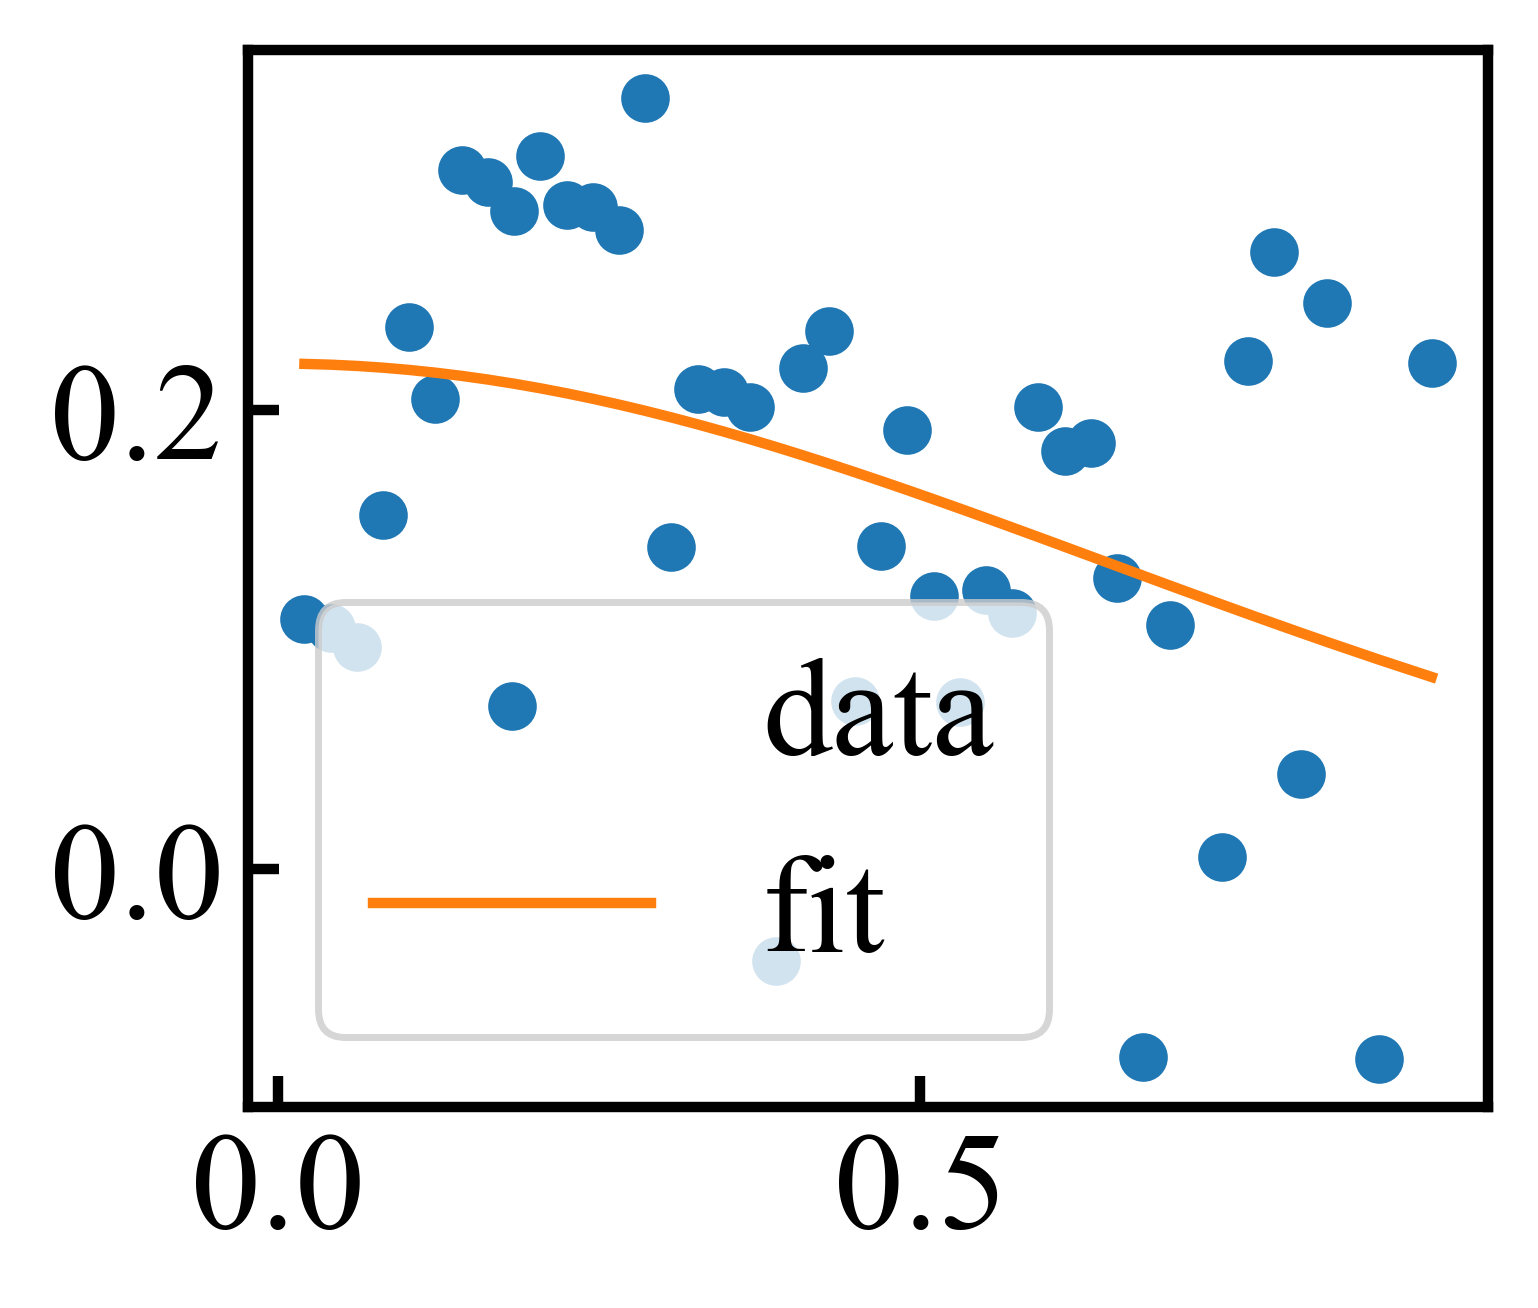

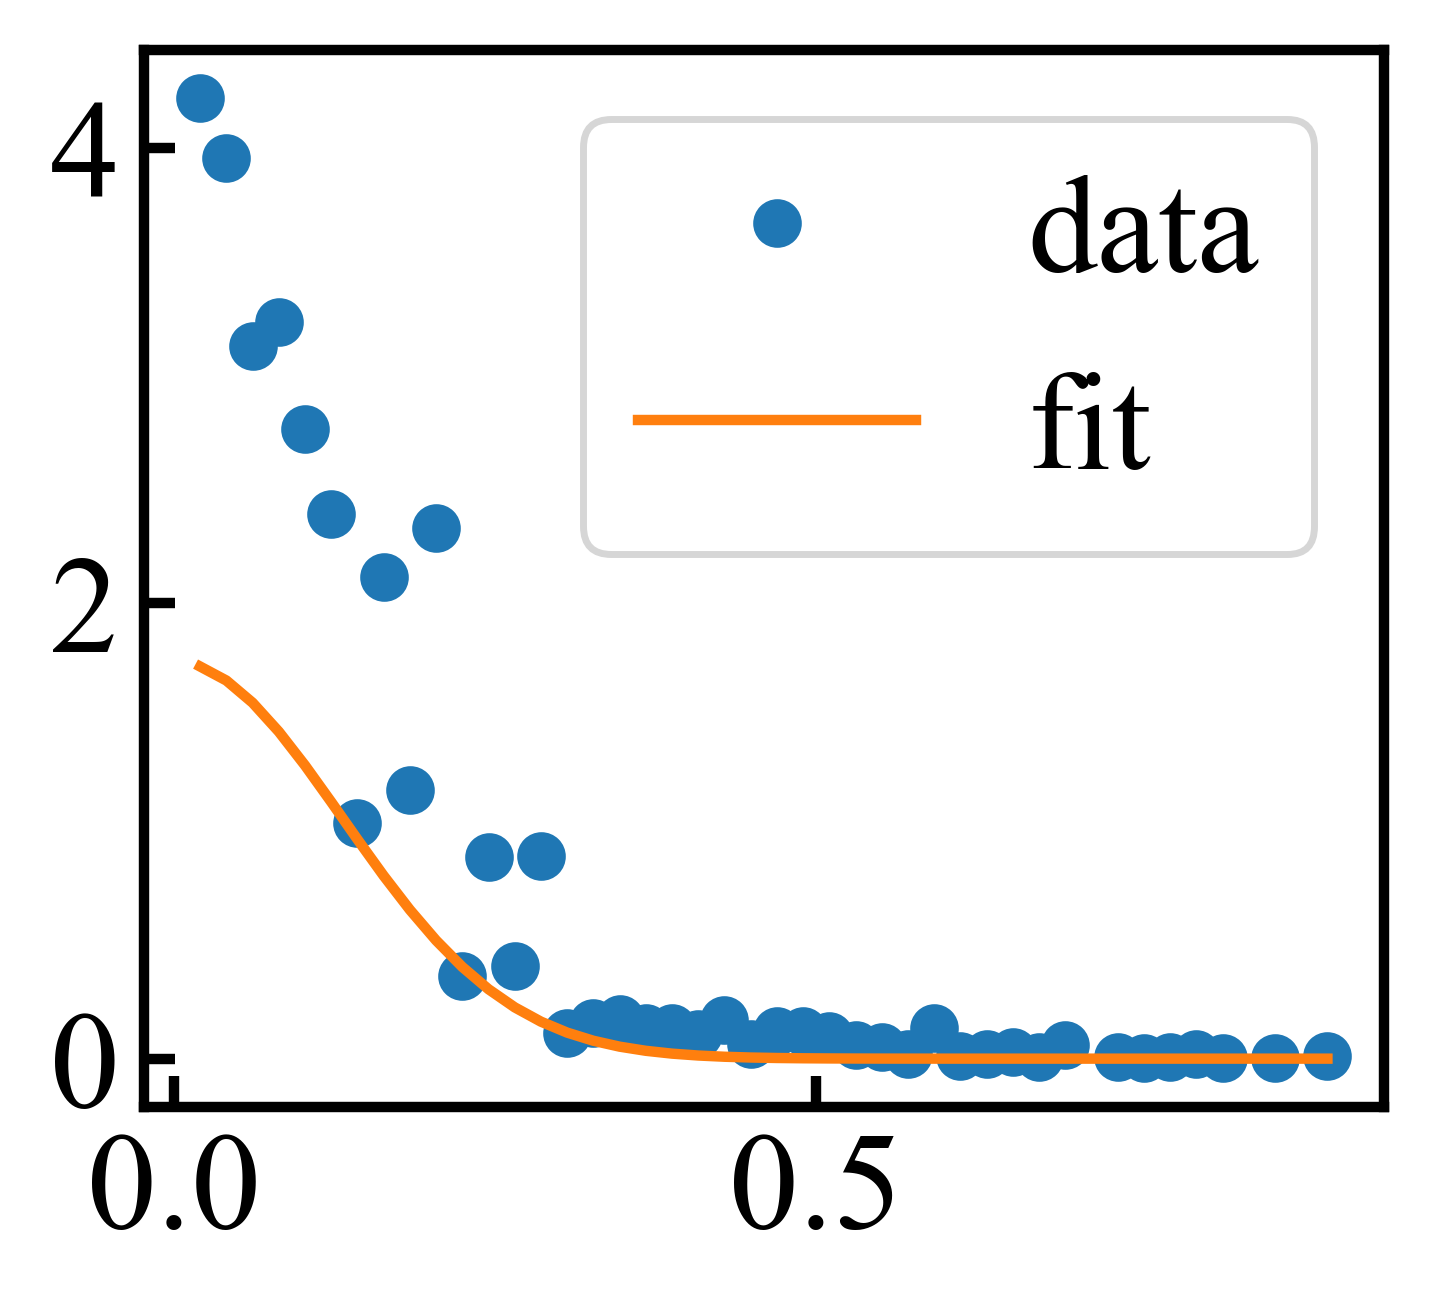

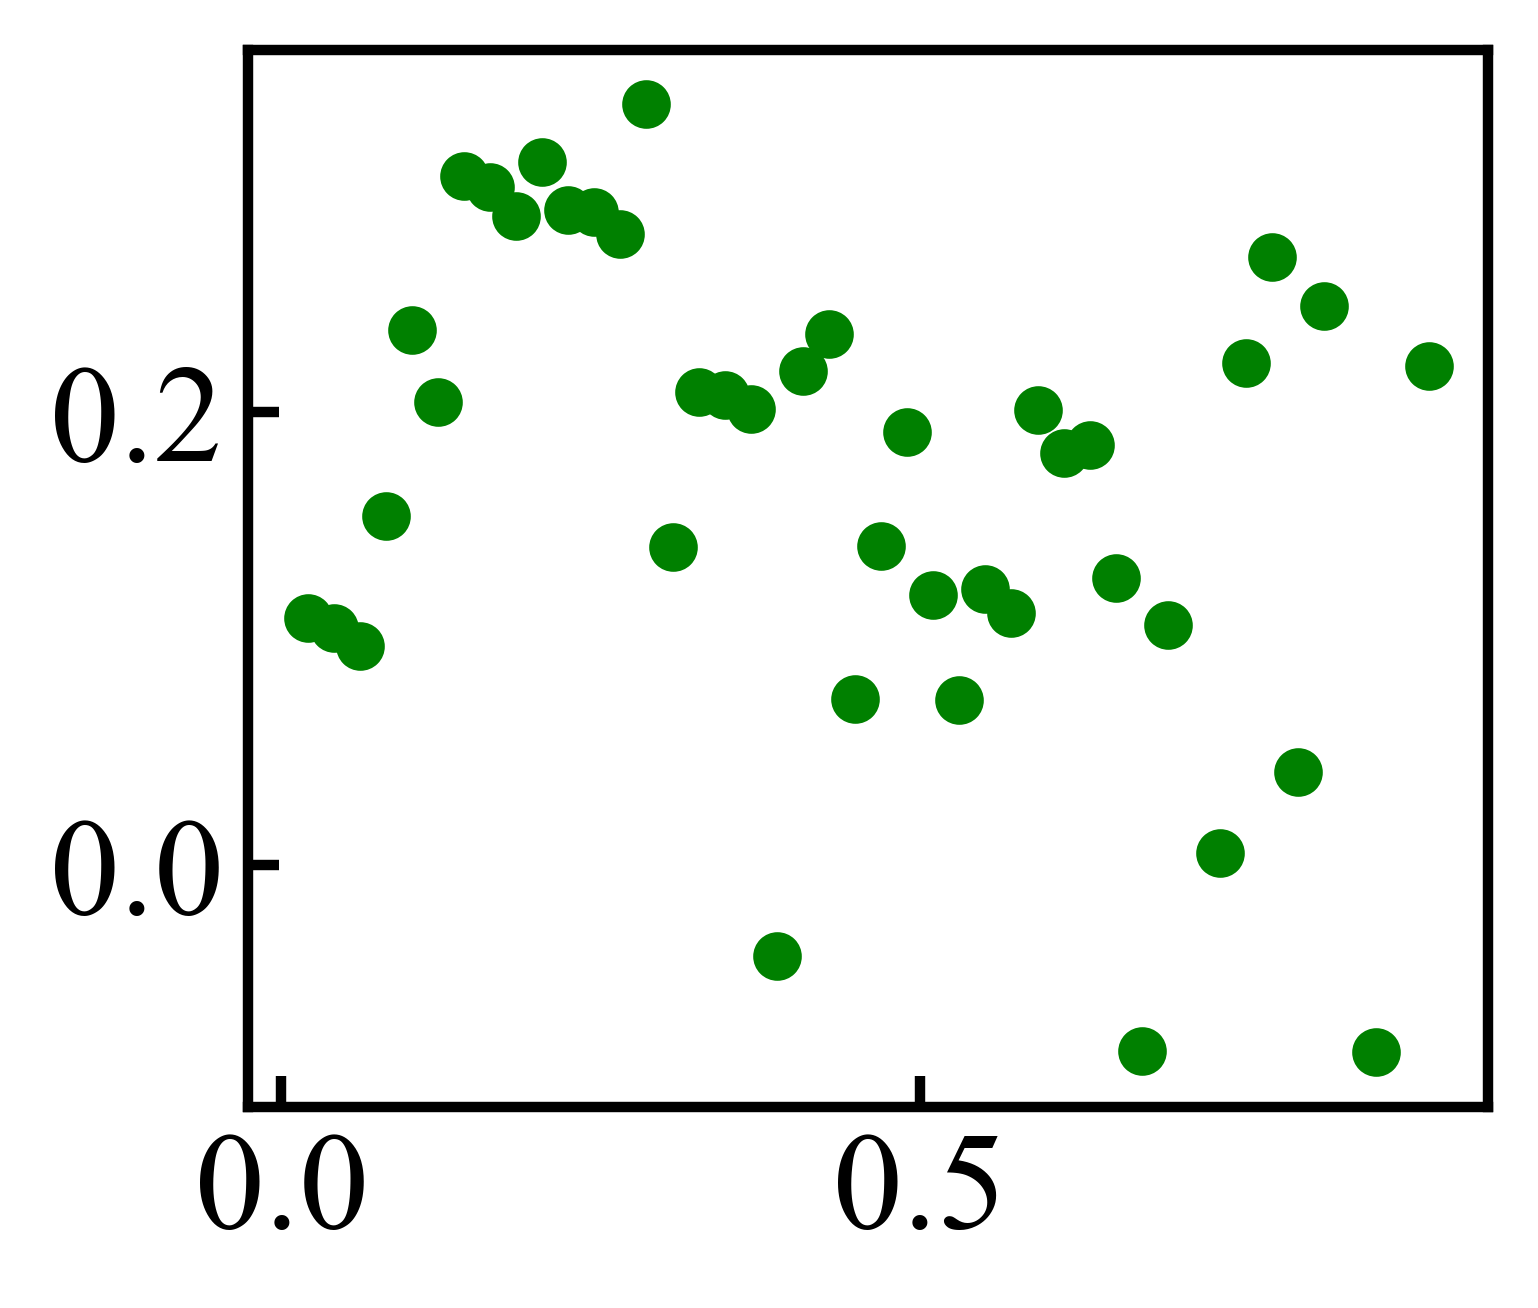

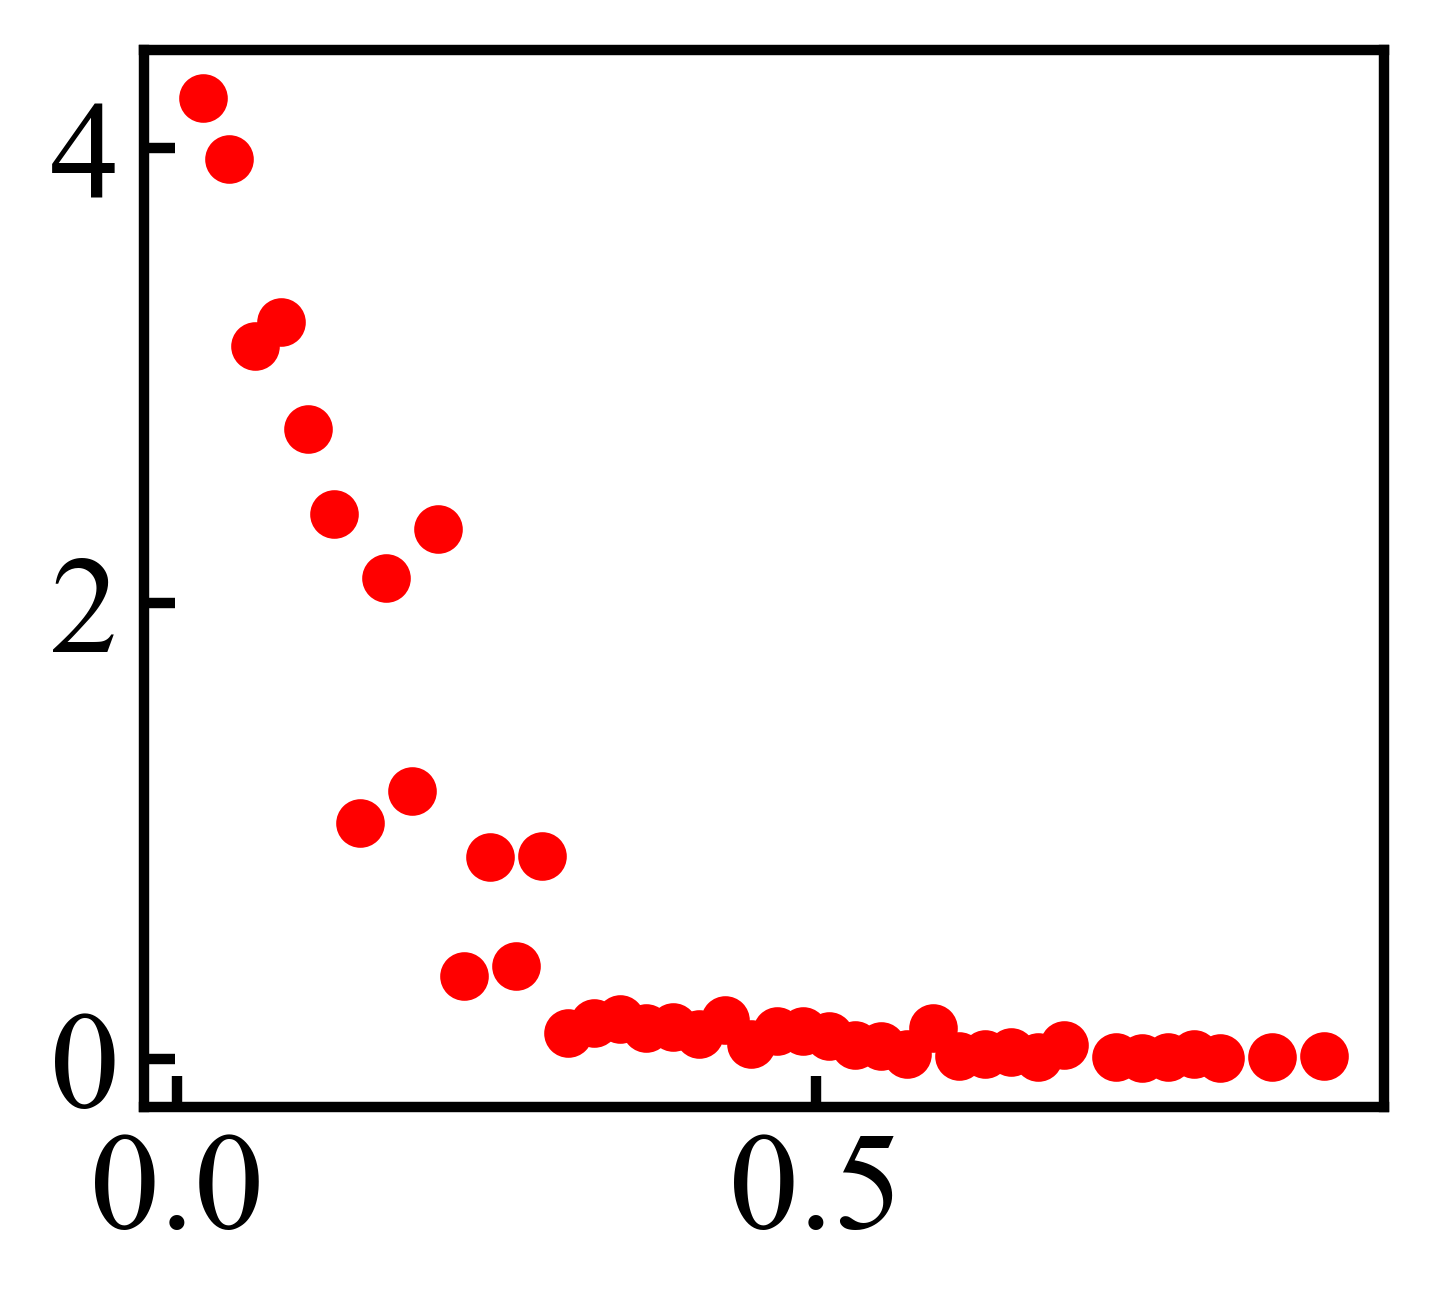

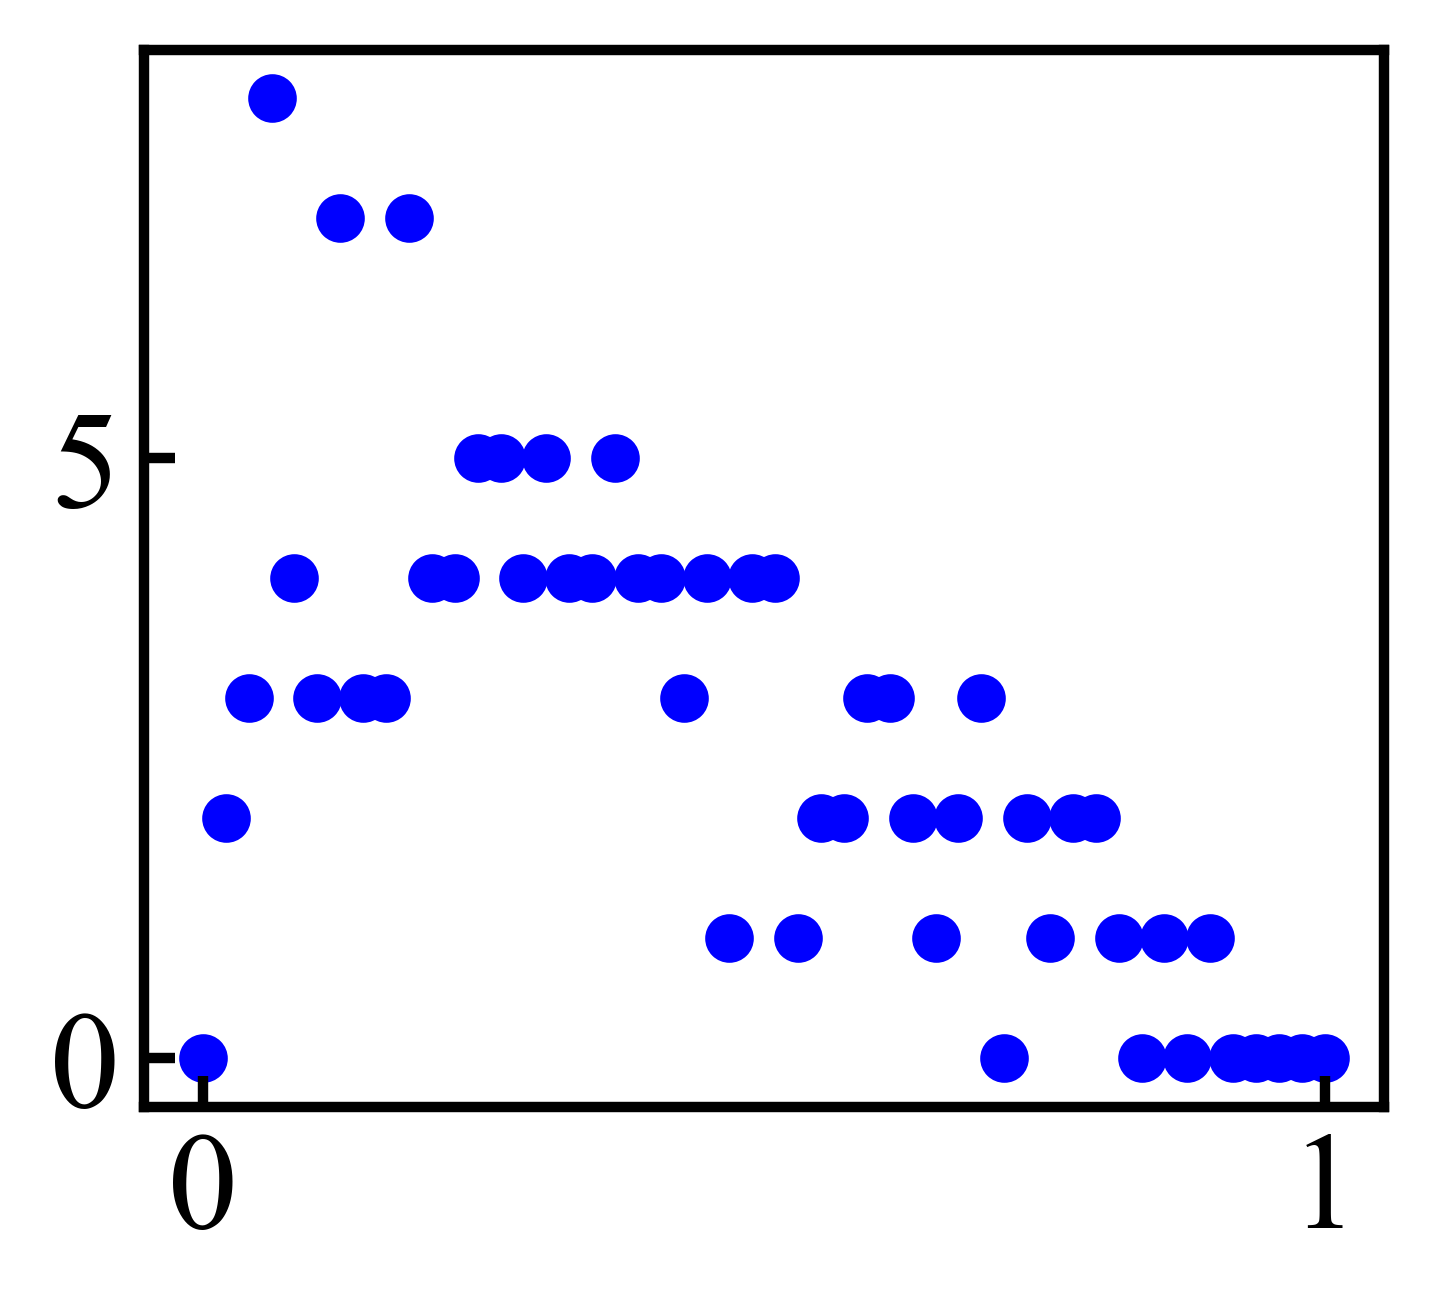

In [132]:
def getLat(peNet, eps):
    '''Get the lattice spacing for any pe'''
    if peNet == 0:
        return 2.**(1./6.)
    out = []
    r = 1.112
    skip = [0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001]
    for j in skip:
        while ljForce(r, eps) < avgCollisionForce(peNet):
            r -= j
        r += j
    return r  



latNet = getLat(350, 1.0)
phi_theory = latToPhi(latNet) / (np.pi/4)


def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

from scipy.optimize import curve_fit
from scipy.stats import norm

parameters, covariance = curve_fit(Gauss, radius_arr_done, align_arr_done)
parameters2, covariance2 = curve_fit(Gauss, radius_arr_done, num_dens_arr_done)

fit_A = parameters[0]
fit_B = parameters[1]

fit_A2 = phi_theory#parameters2[0]
fit_B2 = parameters2[1]

fit_y = Gauss(radius_arr_done, fit_A, fit_B)

fit_y2 = Gauss(radius_arr_done, fit_A2, fit_B2)


plt.plot(radius_arr_done, align_arr_done, 'o', label='data')
plt.plot(radius_arr_done, fit_y, '-', label='fit')
plt.legend()
plt.show()


plt.plot(radius_arr_done, num_dens_arr_done, 'o', label='data')
plt.plot(radius_arr_done, fit_y2, '-', label='fit')
plt.legend()
plt.show()

plt.scatter(radius_arr_done, align_arr_done, c='green')
plt.show()

plt.scatter(radius_arr_done, num_dens_arr_done, c='red')
plt.show()

plt.scatter(radius_arr_final, final_count_count, c='blue')
plt.show()